# 1 Pandas and Plotting

Pandas is a Python library with fairly advanced spreadsheet-like methods. This notebook explores some basic syntax.

This `import` command below enables us to use `pandas`, which is is not included in standard Python, and the `as pd` part means we don't have to type `pandas`, but rather `pd` when referring to a command from the `pandas` library.

In [1]:
import pandas as pd

Read data from a csv-file into a `pandas` data frame. (Yes there is a corresponding command for .xlsx files.) You can see: To call a `pandas` function, we use the `pd.` "pd-dot" notation.

Each data frame works exactly like a "tab" in Excel or Google-sheets. In other words, a data frame is a two-dimensional row-column data structure. 

In [2]:
df = pd.read_csv('AU_COURSE_LIST.csv')
df

,Discipline,Subject,Catalog,Level,Cap Enrl,Tot Enrl
0,Archery,ARCH,162,100,30,13
1,Archery,ARCH,161,100,30,8
2,Archery,ARCH,162,100,30,7
3,Archery,ARCH,241,200,30,11
4,Archery,ARCH,162,100,30,74
...,...,...,...,...,...,...
2845,Karate,BLK,432,400,0,1
2846,Cricket,CRKT,445,400,30,0
2847,Wrestling,WRST,222,200,35,0
2848,Rugby,RGBY,391,300,30,0


If you think about it, using individual "cells" or blocks of "cells" is rarely needed. Most often we need to manipulate a whole column: 

In [3]:
df['Subject']

0       ARCH
1       ARCH
2       ARCH
3       ARCH
4       ARCH
        ... 
2845     BLK
2846    CRKT
2847    WRST
2848    RGBY
2849    CRKT
Name: Subject, Length: 2850, dtype: object

But we can get individual "cells" using the '.loc': `df.loc[row,column]`. Here`column` is the column name and `row` is normally the row index, but it may be the row name - provided that exists.

In [4]:
df.loc[1,"Subject"]

'ARCH'

Of course, we can get a row, too.

In [5]:
df.loc[1]

Discipline    Archery
Subject          ARCH
Catalog           161
Level             100
Cap Enrl           30
Tot Enrl            8
Name: 1, dtype: object

Much more interesting: Defining patterns and filtering out all matching rows.

In [6]:
pattern=(df['Subject']=='CRKT')
df[pattern]

,Discipline,Subject,Catalog,Level,Cap Enrl,Tot Enrl
32,Cricket,CRKT,151,100,30,3
40,Cricket,CRKT,151,100,30,12
45,Cricket,CRKT,151,100,30,0
66,Cricket,CRKT,151,100,30,0
132,Cricket,CRKT,151,100,30,8
...,...,...,...,...,...,...
2840,Cricket,CRKT,405,400,30,0
2841,Cricket,CRKT,505,500,30,0
2842,Cricket,CRKT,381,300,1,1
2846,Cricket,CRKT,445,400,30,0


### Task
Modify the box above to find
* all sword-classes: 'SWRD'.
* all classes offered in the disciplne 'Fencing'.

## Let's investigate enrollment in AU university

That means we deal with the column: `df['Tot Enrl']`.
We can plot:
* The raw data.
* Histograms of the raw data.
* The cumulative distribution function of the raw data.
* A bar graph showing how often each enrollment value appears: `value-counts`.

***If you use floating plots, close each plot before executing the next cell.*** 

<AxesSubplot:title={'center':'Raw enrollment unsorted list'}>

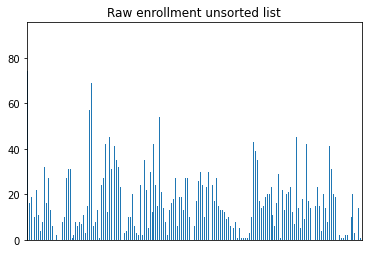

In [12]:
# by default each bar has a label, let's suppress that in this plot 
df['Tot Enrl'].plot.bar(xticks=[], title='Raw enrollment unsorted list')

There is more than one way to skin a cat, and there are at least four good ways to draw histograms. The `df[].hist()` is nice because is works with the DataFrame, but still communicates with matplotlib rather directly.

<AxesSubplot:>

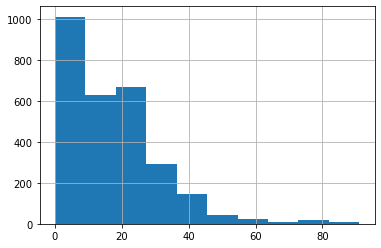

In [13]:
#df['Tot Enrl'].plot.hist(title='default histogram')
df['Tot Enrl'].hist()

A plain vanilla histogram.

<AxesSubplot:>

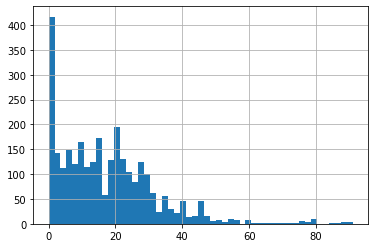

In [18]:
df['Tot Enrl'].hist(bins=51)

A relative frequency histogram or probablity mass function (PMF).

<AxesSubplot:>

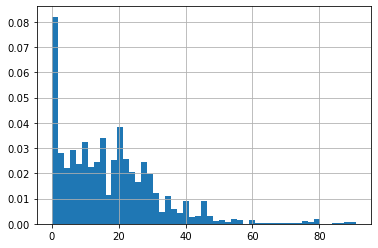

In [17]:
df['Tot Enrl'].hist(bins=51, density=1)

The sum the contributions of everything below = cummulative distribution function (CDF). Study this plot carefully. Make sure you understand why it starts at $0$ and approaches $1$.

<AxesSubplot:>

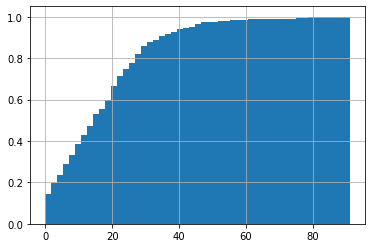

In [20]:
#df['Tot Enrl'].plot.hist(bins=51, cumulative=True, density=1, title='cummulative distribution function')
df['Tot Enrl'].hist(bins=51, cumulative=True, density=1)

In [21]:
# Get the value counts:
#
# This counts how often certain values show up in a column 
# and sorts the values by frequency
#
df['Tot Enrl'].value_counts()

1     212
0     205
20    150
8     120
24    104
     ... 
73      1
77      1
85      1
64      1
51      1
Name: Tot Enrl, Length: 81, dtype: int64

In [ ]:
# Sorting it by value = enrollment is slightly more tricky.
#
counts_by_freq = df['Tot Enrl'].value_counts()
counts_by_value = counts_by_freq.sort_index()
counts_by_value

<AxesSubplot:xlabel='Enrollment', ylabel='Number of classes'>

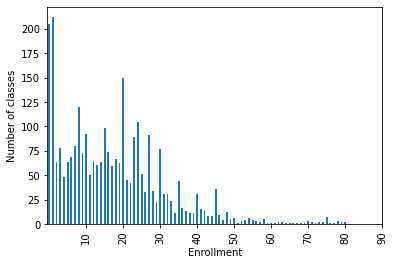

In [28]:
counts_by_value.plot.bar(xticks=[10,20,30,40,50,60,70,80,90], 
                         xlabel='Enrollment', ylabel='Number of classes')

### Task

For each of the five plots:
* Write a brief desciption: What specifically does this plot show?
* Does the plot have a clear message or at least important highlights?
* Make a bar graph of the `Cap Enrl` column. What do this column and plot communicate?
* Define histogram, PMF, and CDF with words and with formulas.